# Are Safe Havens really safe?

Table of Contents

asdsa

## Business Problem

Data

### Data Preparation

For the purposes of this analysis I will create 2 currency indices Swiss Franc (CHF Index) and Japanese Yen (JPY Index)

Each will contain currency cross with USD, GBP, EUR, AUD, CAD which will give a nice balance between export and global currencies

The data was downloaded from yahoo finance and investopedia and pre formated for upload and prepared 

First appropriate libraries will be loaded such as pandas and JPY Currencies basket prepared as following

1. Read all of the currencies into separate DFs
2. Create a new df that will only have the date and an average change for the week

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

AUDJPY=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/AUDJPY.csv")
CADJPY=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/CADJPY.csv")
EURJPY=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/EURJPY.csv")
GBPJPY=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/GBPJPY.csv")
USDJPY=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/USDJPY.csv")

JPYBasket=AUDJPY
JPYBasket=JPYBasket.drop(["Open","High","Low","Close"],axis=1)

JPYBasket['Change']=(JPYBasket['Change']+CADJPY['Change']+EURJPY['Change']+GBPJPY['Change']+USDJPY['Change'])/5*100


JPYBasket.head(5)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


,Date,Change
0,21/03/2005,0.896
1,28/03/2005,-1.170
2,04/04/2005,-0.554
3,11/04/2005,0.848
4,18/04/2005,0.968


Histogram of Weekly returns of JPY Basket Between March 2005 and April 2020

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


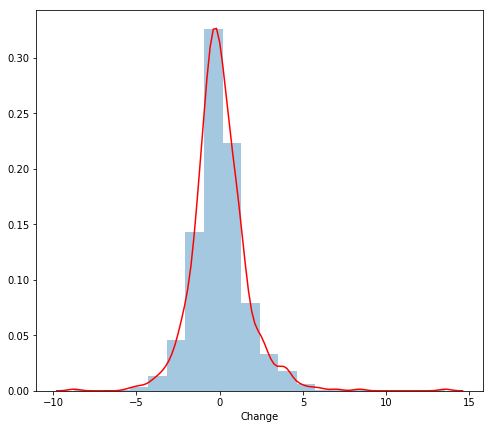

In [25]:
import seaborn as sns
import scipy as stats

##JPYBasket.hist(bins=20,color='yellow')

width = 8
height = 7
plt.figure(figsize=(width, height))

g=sns.distplot(JPYBasket['Change'], bins = 20,kde_kws={"color": "red"})



In [28]:
print(stats.std(JPYBasket))

Change    1.663753
dtype: float64


Create the Currency Basket for Swiss France

In [29]:
CHFAUD=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/CHFAUD.csv")
CHFCAD=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/CHFCAD.csv")
CHFEUR=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/CHFEUR.csv")
CHFGBP=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/CHFGBP.csv")
CHFUSD=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/CHFUSD.csv")

CHFBasket=CHFAUD
CHFBasket=CHFBasket.drop(["Open","High","Low","Close"],axis=1)

CHFBasket['Change %']=(CHFBasket['Change %']+CHFCAD['Change %']+CHFEUR['Change %']+CHFGBP['Change %']+CHFUSD['Change %'])/5


CHFBasket.head(5)

,Date,Change %
0,21/03/2005,-1.120106
1,28/03/2005,-0.385056
2,04/04/2005,0.637865
3,11/04/2005,0.031149
4,18/04/2005,0.608414


Histogram of Weekly returns of CHF Basket Between March 2005 and April 2020

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


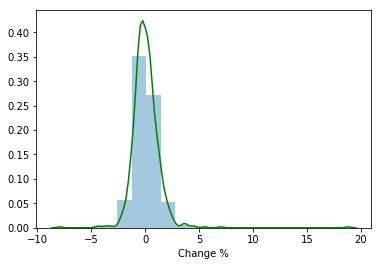

In [31]:
g=sns.distplot(CHFBasket['Change %'], bins = 20,kde_kws={"color": "green"})

#### Historical Performance of Gold Weekly 2005-2020

Load Gold into the notebook

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Change    1.663753
dtype: float64
Change %    1.296191
dtype: float64
Change %    2.547375
dtype: float64
Change    0.003794
dtype: float64
Change %    0.06134
dtype: float64
Change %    0.20869
dtype: float64


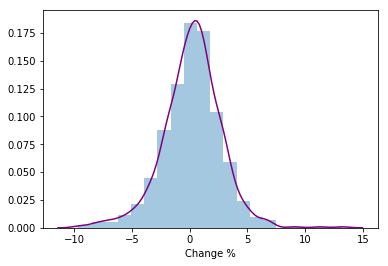

In [38]:
Gold=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/Gold_Futures.csv")

Gold=Gold.drop(["Open","High","Low","Close"],axis=1)

##Gold.hist(bins=20)

g=sns.distplot(Gold['Change %'], bins = 20,kde_kws={"color": "purple"})

print(stats.std(JPYBasket))
print(stats.std(CHFBasket))
print(stats.std(Gold))


print(stats.mean(JPYBasket))
print(stats.mean(CHFBasket))
print(stats.mean(Gold))

Histogram of Weekly Gold Performance 2005-2020. 

## Correlation Between Safe Havens

Initial look at the histograms indicated that in terms of raw number of changes there was a good correlation between JPY Basket, CHF Basket and Gold. Prior to combining all 3 into a "Safe Haven" superbasket correlation between following pairs would be confirmed

JPY vs CHF
JPY vs Gold
CHF vs Gold

#### Correlation Between JPY Basket and CHF Basket



In [37]:
##Merge the Change data into one dataframe for easier analysis


SAFE_HAVENS = pd.merge(JPYBasket, CHFBasket, on='Date')

##Clean up the column names for easier analysis later
SAFE_HAVENS.rename(columns = {'Change':'% Change JPY'}, inplace = True) 
SAFE_HAVENS.rename(columns = {'Change %':'% Change CHF'}, inplace = True) 

SAFE_HAVENS = pd.merge(SAFE_HAVENS, Gold, on='Date')
SAFE_HAVENS.rename(columns = {'Change %':'% Change Gold'}, inplace = True) 

SAFE_HAVENS.head()

SAFE_HAVENS.corr()

,% Change JPY,% Change CHF,% Change Gold
% Change JPY,1.000000,0.370377,-0.022765
% Change CHF,0.370377,1.000000,0.154073
% Change Gold,-0.022765,0.154073,1.000000


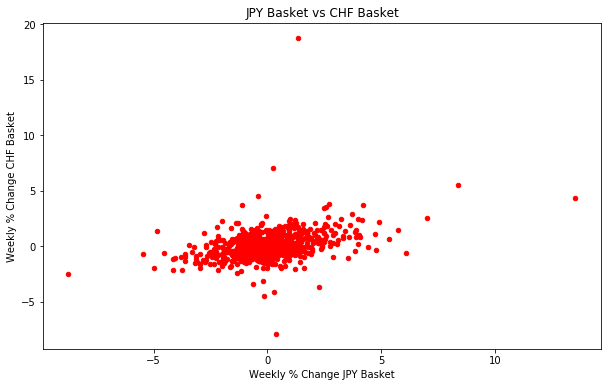

In [161]:


SAFE_HAVENS.plot(kind='scatter', x='% Change JPY', y='% Change CHF', figsize=(10, 6), color='red')

plt.title('JPY Basket vs CHF Basket')
plt.xlabel('Weekly % Change JPY Basket')
plt.ylabel('Weekly % Change CHF Basket')

plt.show()

The Scatter Plot above indicates that there appears to be a relationship between the JPY Basket of currencies and CHF Basket of currencies.

The next step is to understand the strength of the relationship through regression analysis, given how the scatter is spread it suggests that linear regression is a way to proceed.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(5,18,'R-Squared score: 0.137\nMSE: 1.45%')

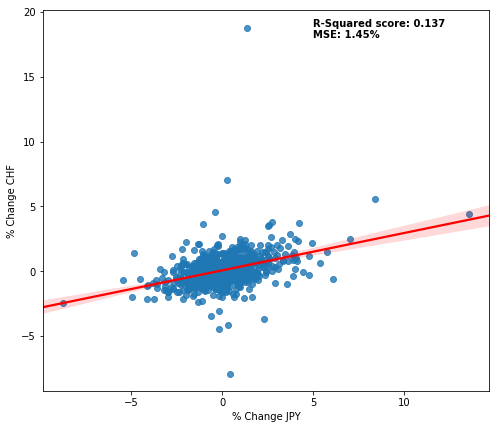

In [47]:
from sklearn.linear_model import LinearRegression

%matplotlib inline 



X = SAFE_HAVENS[['% Change JPY']]
Y = SAFE_HAVENS['% Change CHF']

lm = LinearRegression()
lm

lm.fit(X,Y)



width = 8
height = 7
plt.figure(figsize=(width, height))
g=sns.regplot(x="% Change JPY", y="% Change CHF", data=SAFE_HAVENS,line_kws={"color": "red"})

g.text(5.0, 18, "R-Squared score: 0.137\nMSE: 1.45%", horizontalalignment='left', size='medium', color='black', weight='semibold')

##g = g.annotate("R-Squared score: 0.137  MSE: 1.45%")

In [28]:
Yhat=lm.predict(X)
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(Y,Yhat)


mse = mean_squared_error(SAFE_HAVENS['% Change CHF'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)

The mean square error of predicted and actual values is:  1.4514566226343442
The R-square is:  0.13717876360636216


In [153]:
print(lm.intercept_)
print(lm.coef_)

0.06024535062487863
[0.28855273]


Linear regression was a very poor predictor at determining the values between JPY and CHF




The intercept is at **0.06** and the coefficient is **0.28**. R square score of 0.13 and MSE of 1.45%

There are 4 points of interest that warrant further investigation
* Extreme left of the regression line occured on **27/10/2008 JPY Basket -8.74%, CHF Basket -2.48%** 
* Extreme right of the regression line occured on **20/10/2008 JPY Basket 13.54%, CHF Basket 4.38%**
* Occured on **12/01/2015 JPY Basket 1.33%, CHF Basket 18.79%**
* Occured on **05/09/2011 JPY Basket 0.39%, CHF Basket -7.9%**

The 4 extreme points can be explained by

2008 GFC Crisis

2011
2015

Further investigation was required specifically Polynomial Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=50)
pr

X = SAFE_HAVENS[['% Change JPY']]
Y = SAFE_HAVENS['% Change CHF']

x_poly = pr.fit_transform(X)



model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)



1.2956547201623083
0.002080917222963108


When Running the model through the polynomial regression the following observations were seen

2nd Order R square returning **0.13 and MSE 1.20%.**
3nd Order R square returning **0.13 and MSE 1.20%.**
2nd Order R square returning **0.12 and MSE 1.20%.**
2nd Order R square returning **0.12 and MSE 1.20%.**


##### Pearson Correlation

As regression showed that it was not possible to predict the values based on the data to confirm that the Safe Havens could still combined correlation between them was tested. It was therefore imporartant to understand if the linear relationship was strong and the statistical significance of it


In [30]:
from scipy import stats


pearson_coef, p_value = stats.pearsonr(SAFE_HAVENS['% Change JPY'], SAFE_HAVENS['% Change CHF'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3703765160027862  with a P-value of P = 5.801699101846263e-27


Since the p-value is <0.001, the correlation between % Change JPY Basket and % Change CHF Basket is statistically significant, but the linear relationship is weak (~0.37)

#### Mapping JPY Basket to Gold

The next step of the investigation was to assess performance of JPY Basket versus Gold

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


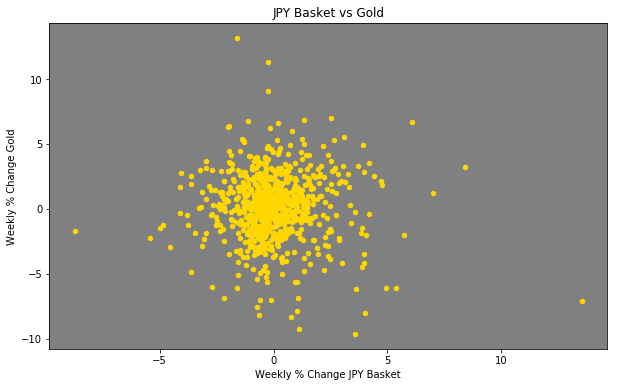

In [174]:
SAFE_HAVENS.plot(kind='scatter', x='% Change JPY', y='% Change Gold', figsize=(10, 6), color='gold')

ax = plt.axes()
ax.set_facecolor("grey")

plt.title('JPY Basket vs Gold')
plt.xlabel('Weekly % Change JPY Basket')
plt.ylabel('Weekly % Change Gold')

plt.show()

Initial observation of the Gold Scatter plot would indicate that there is a much less clear correlation between the Safe Haven of Gold vs JPY Basket that requires further investigation.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(5,12,'R-Squared score: -0.05\nMSE: 6.8%')

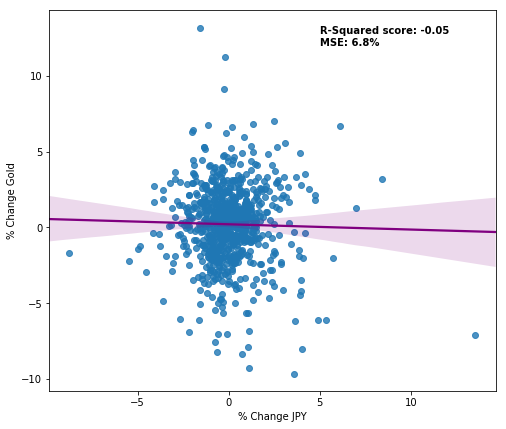

In [54]:
width = 8
height = 7
plt.figure(figsize=(width, height))
##ax.set_facecolor("grey")
g=sns.regplot(x="% Change JPY", y="% Change Gold", data=SAFE_HAVENS,line_kws={"color": "purple"})
g.text(5.0, 12, "R-Squared score: -0.05\nMSE: 6.8%", horizontalalignment='left', size='medium', color='black', weight='semibold')


In [51]:
X = SAFE_HAVENS[['% Change JPY']]
Y = SAFE_HAVENS['% Change Gold']

Yhat=lm.predict(X)
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(Y,Yhat)
mse = mean_squared_error(SAFE_HAVENS['% Change Gold'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)

The mean square error of predicted and actual values is:  6.797256728805738
The R-square is:  -0.04748553792253385


The chart indicates a very loose negative linear relation between JPY and Gold! Specifically the **intercept is **0.208 and the coefficient -0.035** 

The next step would be to attempt Polynomial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=5)
pr

X1 = SAFE_HAVENS[['% Change JPY']]
Y1 = SAFE_HAVENS['% Change Gold']

x_poly1 = pr.fit_transform(X1)



model = LinearRegression()
model.fit(x_poly1, Y)
y_poly_pred1 = model.predict(x_poly1)

rmse = np.sqrt(mean_squared_error(Y1,y_poly_pred1))
r2 = r2_score(Y1,y_poly_pred1)
print(rmse)
print(r2)




2.610196936416927
-0.04993137406116732


When Running the model through the polynomial regression JPY Basket versus Gold the following observations were seen

2nd Order R square returning **0.01 and MSE 2.53%.**
10th Order R square returning **0.03 and MSE 2.51%.**
50th Order R square returning **0.01 and MSE 2.53%.**

This indicated that regression would be a poor predictor of future pricing

##### Pearson Correlation

As regression showed that it was not possible to predict the values based on the data to confirm that the Safe Havens could still combined correlation between them was tested. It was therefore imporartant to understand if the linear relationship was strong and the statistical significance of it

In [231]:
pearson_coef, p_value = stats.pearsonr(SAFE_HAVENS['% Change JPY'], SAFE_HAVENS['% Change Gold'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.022765059142986543  with a P-value of P = 0.5239287865230888


Since the p-value is >0.001, the correlation between % Change JPY Basket and % Change Gold is statistically insignificant and the linear relationship is non-existent(~-0.02). 

#### Mapping CHF Basket to Gold

The final step was to understand if it was possible to predict Gold values based on CHF Basket as well as if there was a correlation

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


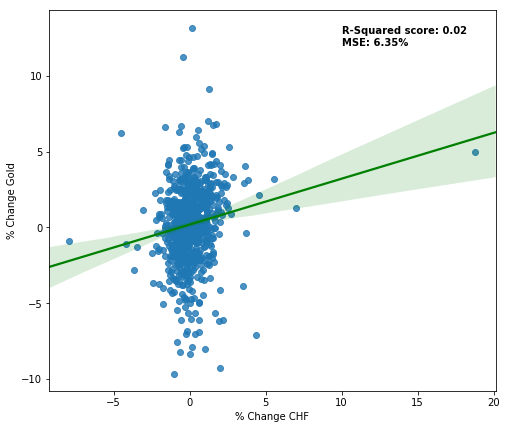

In [61]:
width = 8
height = 7
plt.figure(figsize=(width, height))
g=sns.regplot(x="% Change CHF", y="% Change Gold", data=SAFE_HAVENS,line_kws={"color": "green"})
g=g.text(10.0, 12, "R-Squared score: 0.02\nMSE: 6.35%", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [74]:
pr=PolynomialFeatures(degree=3)
pr

X1 = SAFE_HAVENS[['% Change CHF']]
Y1 = SAFE_HAVENS['% Change Gold']

x_poly1 = pr.fit_transform(X1)



model = LinearRegression()
model.fit(x_poly1, Y)
y_poly_pred1 = model.predict(x_poly1)

rmse = np.sqrt(mean_squared_error(Y1,y_poly_pred1))
r2 = r2_score(Y1,y_poly_pred1)
print(rmse)
print(r2)

2.678600088098253
-0.10568169533617211


As with the previous analysis it appears that Regression could not be used to predict the prices of Gold based on the CHF Basket. Furthermore the **R2 was 0.02 and Mean Square error 6.48%**

##### Pearson Correlation

As regression showed that it was not possible to predict the values based on the data to confirm that the Safe Havens could still combined correlation between them was tested. It was therefore imporartant to understand if the linear relationship was strong and the statistical significance of it

In [56]:
X = SAFE_HAVENS[['% Change CHF']]
Y = SAFE_HAVENS['% Change Gold']

Yhat=lm.predict(X)
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(Y,Yhat)
mse = mean_squared_error(SAFE_HAVENS['% Change Gold'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)


##pearson_coef, p_value = stats.pearsonr(SAFE_HAVENS['% Change CHF'], SAFE_HAVENS['% Change Gold'])
##print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The mean square error of predicted and actual values is:  6.352446960930108
The R-square is:  0.021061497678145025


Since the p-value is <0.001, the correlation between % Change CHF Basket and % Change Gold is statistically significant, but the linear relationship is weak (~0.15)

## Assesing Equities as predictor of Safe Havens (JPY Basket, CHF Basket, Gold) Performance

Based on the previous work it was not possible to combine the 3 safe havens into one amalgameted indicator. Therefore the next section will uncover if equities performance (represented by Dow Jones Industrial Average) can be a predictor of Safe Havens.

In addition I will look at what / if there is a correlation between the safe havens and DJIA. If there is the best safe haven it will be identified.

In [115]:

## Import Dow Jones Industrial Average File
DJIA=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Data-for-Safe-Havens/DJIA.csv")

DJIA=DJIA.drop(["Open","High","Low","Close"],axis=1)

##Create New Data Frame Combining Safe Havens and DJIA for Analysis

##Investments=SAFE_HAVENS
Investments = pd.merge(SAFE_HAVENS, DJIA, on='Date')

##
##Reindex the column as DJIA will be on the x axis

column_names = ["Date","% Change DJIA", "% Change JPY", "% Change CHF","% Change Gold"]
Investments = Investments.reindex(columns=column_names)

##DJIA.head()
Investments.head()

,Date,% Change DJIA,% Change JPY,% Change CHF,% Change Gold
0,21/03/2005,-1.7573,0.896,-1.120106,-3.32
1,28/03/2005,-0.3693,-1.170,-0.385056,0.28
2,04/04/2005,0.5482,-0.554,0.637865,0.23
3,11/04/2005,-3.5734,0.848,0.031149,-0.47
4,18/04/2005,0.6959,0.968,0.608414,2.21


### Dow Jones Industrial Average Overview

Prior to analyzing the impact of Dow Jones on other Baskets I will examine the ditribution of the returns via a box plot

-0.8804000000000001
1.36735
-18.1513
12.8445


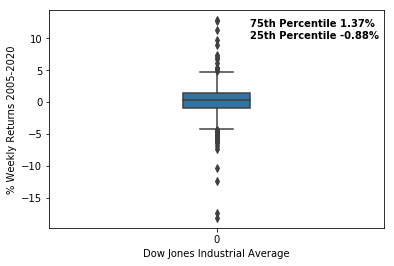

In [92]:
##Investments['% Change DJIA'].plot(kind='box', figsize=(8, 6))

##plt.title('Weekly Returns of DJIA 2005-2020')
##plt.ylabel('% Weekly return')

##plt.show()

ax=sns.boxplot( data=Investments["% Change DJIA"], width=0.2)
ax.set(xlabel="Dow Jones Industrial Average", ylabel = '% Weekly Returns 2005-2020')
ax=ax.text(0.1, 10, "75th Percentile 1.37%\n25th Percentile -0.88%", horizontalalignment='left', size='medium', color='black', weight='semibold')


##Understand 25th and 75th Percentile
q1 = np.quantile(Investments['% Change DJIA'], 0.25, interpolation='midpoint')
q3 = np.quantile(Investments['% Change DJIA'], 0.75, interpolation='midpoint')
print(q1)
print(q3)

print(Investments['% Change DJIA'].min())
print(Investments['% Change DJIA'].max())

The Box plot shows that 25th percentile falls on 0.88% and 75the Percentile on 1.36% and there is slight skew to the plus side

###### Comparing Returns across all asset Classes

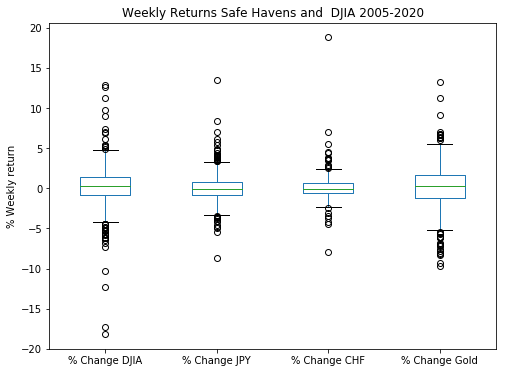

In [13]:
Investments.plot(kind='box', figsize=(8, 6))

plt.title('Weekly Returns Safe Havens and  DJIA 2005-2020')
plt.ylabel('% Weekly return')

plt.show()

It appears that Gold has the widest range of returns within 10-90 and CHF the narrowest

### Dow Jones Industrial Average as Predictor and Correlation with JPY Basket

First I will look if there is a clearly identifieable flows between DJIA and JPY Basket

The mean square error of predicted and actual values is:  2.877128759509344
The R-square is:  -0.03807832160522984


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


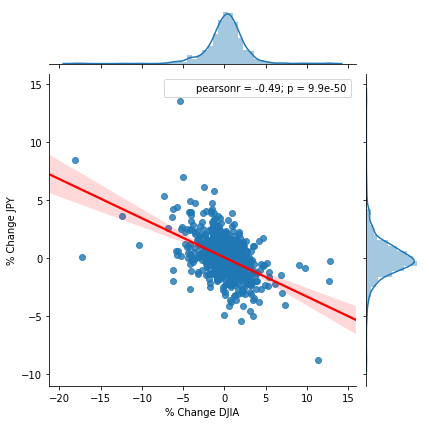

In [120]:
from scipy import stats
X = Investments[['% Change DJIA']]
Y = Investments['% Change JPY']


Yhat=lm.predict(X)
r2 = r2_score(Y,Yhat)
mse = mean_squared_error(Investments['% Change JPY'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)


width = 8
height = 7
plt.figure(figsize=(width, height))

##g=sns.regplot(x="% Change DJIA", y="% Change JPY", data=Investments,line_kws={"color": "red"})

##g=g.text(4.5, 12, "R-Squared score: -0.6\nMSE: 2.09%", horizontalalignment='left', size='medium', color='red', weight='semibold')


g=sns.jointplot(x="% Change DJIA", y="% Change JPY", data=Investments,kind="reg",line_kws={"color": "red"})
g = g.annotate(stats.pearsonr)

In [128]:
from scipy import stats

X = Investments[['% Change DJIA']]
Y = Investments['% Change JPY']
Yhat=lm.predict(X)
r2 = r2_score(Y,Yhat)
mse = mean_squared_error(Investments['% Change JPY'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)  

The mean square error of predicted and actual values is:  2.877128759509344
The R-square is:  -0.03807832160522984


As can be seen there is a statistically significant correlation though it is not very strong negative is clear.

## Dow Jones Industrial Average as Predictor and Correlation with CHF Basket

Next the same process will happen with the CHF Basket

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


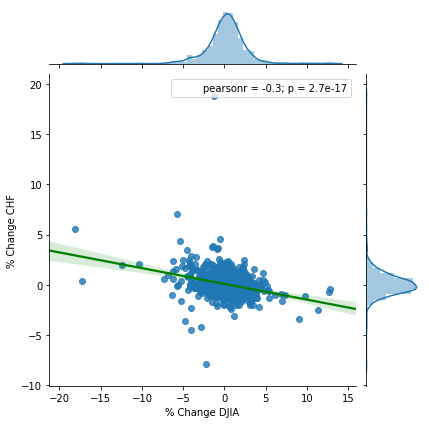

In [122]:
width = 8
height = 7
plt.figure(figsize=(width, height))

g=sns.jointplot(x="% Change DJIA", y="% Change CHF", data=Investments,kind="reg",line_kws={"color": "green"})
g = g.annotate(stats.pearsonr)

In [127]:
X = Investments[['% Change DJIA']]
Y = Investments['% Change CHF']
Yhat=lm.predict(X)
r2 = r2_score(Y,Yhat)
mse = mean_squared_error(Investments['% Change CHF'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2) 

The mean square error of predicted and actual values is:  2.1506451509321076
The R-square is:  -0.2784552285161179


As can be seen there is a statistically significant correlation extremely weak negative correlation. The regression values will not give a clear indication

## Dow Jones Industrial Average as Predictor and Correlation with Gold

Next the same process will happen with the Gold

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


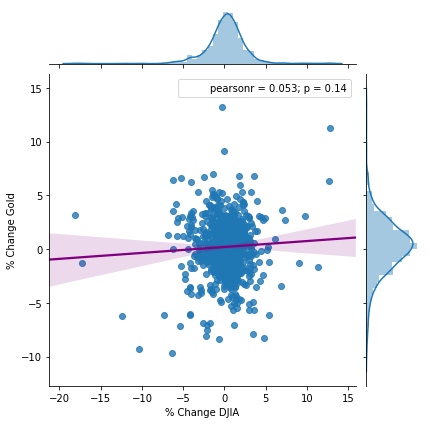

In [123]:
width = 8
height = 7
plt.figure(figsize=(width, height))

g=sns.jointplot(x="% Change DJIA", y="% Change Gold", data=Investments,kind="reg",line_kws={"color": "purple"})
g = g.annotate(stats.pearsonr)

In [126]:
X = Investments[['% Change DJIA']]
Y = Investments['% Change Gold']
Yhat=lm.predict(X)
r2 = r2_score(Y,Yhat)
mse = mean_squared_error(Investments['% Change Gold'], Yhat)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)

The mean square error of predicted and actual values is:  7.287338477706718
The R-square is:  -0.12300917412683443


In [45]:
pearson_coef, p_value = stats.pearsonr(Investments['% Change DJIA'], Investments['% Change Gold'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05291629153763965  with a P-value of P = 0.13828114525665006


As can be seen there is not correlation extremely weak correlation and it is actually very slightly positive which is against the expectations. 

### DJIA versus Safe Havens Analysis

While none of the Safe Havens showed huge correlation DJIA versus JPY Did show the most Promise

## DJIA versus JPY Basket During Extreme Events

A potential explanation for why such poor correlation and regression was observed is due to all data for the last 15 years being analysed. A possible amendment to the hypothesis is what if only data during times of extremely poor performance was taken. JPY Basket has shown the most promise therefore it is proposed for it to consider

2 Scenarious were selected
Worst 20% performing weeks for DJIA
Worst 10% performing weeks for DJIA

### Worst 20% Analysis

The mean square error of predicted and actual values is:  4.041091150033521
The R-square is:  0.09093151952004097


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


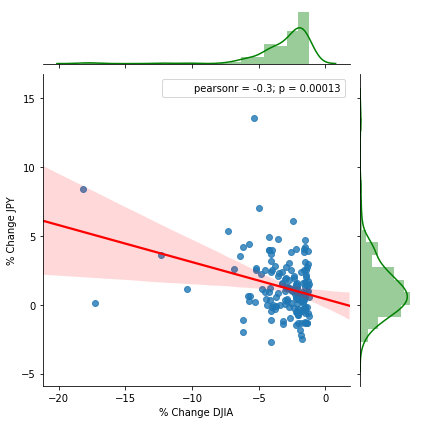

In [134]:
## Create new dataset to only contain 20% worst DJIA performance

Worst20=Investments.nsmallest(156,"% Change DJIA")

X6 = Worst20[['% Change DJIA']]
Y6 = Worst20['% Change JPY']

lm = LinearRegression()
lm
lm.fit(X6,Y6)


Yhat6=lm.predict(X6)
r2 = r2_score(Y6,Yhat6)


mse = mean_squared_error(Worst20['% Change JPY'], Yhat6)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)


width = 8
height = 7
plt.figure(figsize=(width, height))

g=sns.jointplot(x="% Change DJIA", y="% Change JPY", data=Worst20,kind="reg",line_kws={"color": "red"},marginal_kws={'color': 'green'})
g = g.annotate(stats.pearsonr)

In [54]:
pearson_coef, p_value = stats.pearsonr(Worst20['% Change DJIA'], Worst20['% Change JPY'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.30154853592753667  with a P-value of P = 0.00013051346114680977


The result for worst 20% Was Even Worse for JPY Basket than for full data set

### Worst 10% Analysis

The mean square error of predicted and actual values is:  5.48776686744794
The R-square is:  0.0561370582595514


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


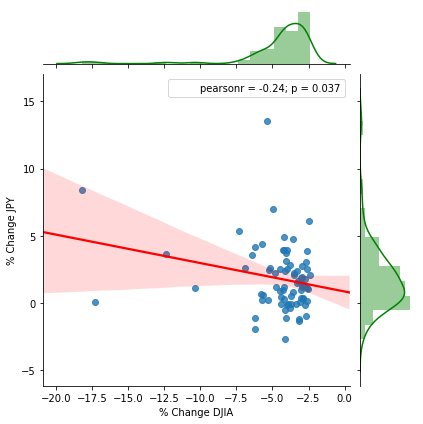

In [135]:
Worst10=Worst20.nsmallest(78,"% Change DJIA")

X7 = Worst10[['% Change DJIA']]
Y7 = Worst10['% Change JPY']



Yhat7=lm.predict(X7)
r2 = r2_score(Y7,Yhat7)


mse = mean_squared_error(Worst10['% Change JPY'], Yhat7)
print('The mean square error of predicted and actual values is: ', mse)
print('The R-square is: ', r2)


width = 8
height = 7
plt.figure(figsize=(width, height))

g=sns.jointplot(x="% Change DJIA", y="% Change JPY", data=Worst10,kind="reg",line_kws={"color": "red"},marginal_kws={'color': 'green'})
g = g.annotate(stats.pearsonr)

In [60]:
pearson_coef, p_value = stats.pearsonr(Worst10['% Change DJIA'], Worst10['% Change JPY'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.23693260277883102  with a P-value of P = 0.036744924695176324


The result for worst 10% Was Even less reliable than for 20%.



#### Analysis

Based on the data there appears to be a very limited correlation when concentrating on the lowest part of DJIA performance. There were further alternatives to explore Logarithmic and Sigmoidal


### Logarithmic 

As the most promsing dataset was DJIA versus JPY Basket Logarthimic was applied to it



<Figure size 576x504 with 0 Axes>

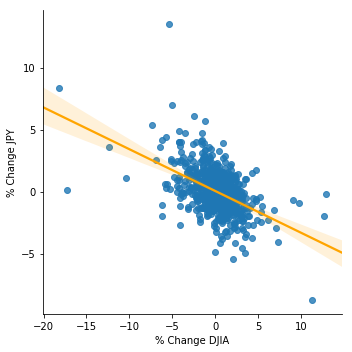

In [63]:
X7 = Worst10[['% Change DJIA']]
Y7 = Worst10['% Change JPY']






width = 8
height = 7
plt.figure(figsize=(width, height))

sns.lmplot(x="% Change DJIA", y="% Change JPY", data=Investments,line_kws={"color": "orange"})

Another option was to attempt other modelling / predictive algorithms if we convert higher or lower

## Investigate Other Models versus JPY

### JPY Logistic Regression Model



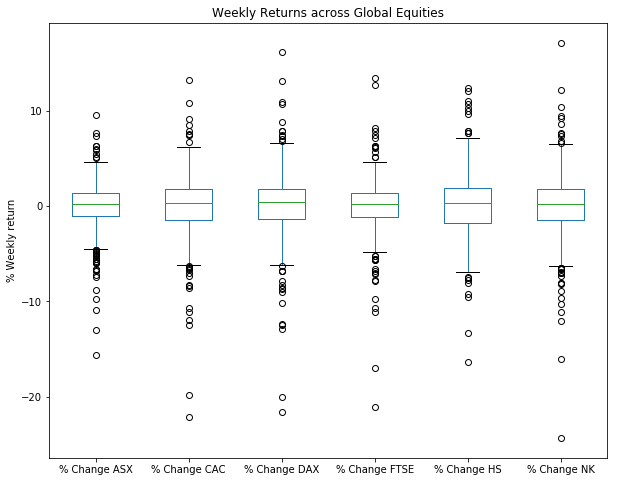

In [136]:
##Load the additional Risk Assets to serve as explanatory variables
ASX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/ASX.csv")
CAC=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/CAC.csv")
DAX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/DAX.csv")
FTSE100=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/FTSE100.csv")
HS=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/HS.csv")
NK=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/Nikkei.csv")

## Drop all columns from data frames except %Change
ASX=ASX.drop(["Open","High","Low","Close"],axis=1)
CAC=CAC.drop(["Open","High","Low","Close"],axis=1)
DAX=DAX.drop(["Open","High","Low","Close"],axis=1)
FTSE100=FTSE100.drop(["Open","High","Low","Close"],axis=1)
HS=HS.drop(["Open","High","Low","Close"],axis=1)
NK=NK.drop(["Open","High","Low","Close"],axis=1)

##Combine all assets into a new DF

from functools import reduce
data_frames = [ASX, CAC, DAX, FTSE100, HS, NK]


RiskAssets = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)

##RiskAssets = pd.merge(RiskAssets, ASX, CAC, DAX, FTSE100, HS, NK on='Date')


## Get an initial view of the distribution of weekly returns for new asset classes

pal = sns.color_palette('Paired')


RiskAssets.plot(kind='box', figsize=(10, 8))

plt.title('Weekly Returns across Global Equities')
plt.ylabel('% Weekly return')

plt.show()

In [137]:
##This DF will be used for full analysis

RAFull=pd.merge(RiskAssets,Investments)

RATemp=RAFull



RAFull['JPY']=np.where(RAFull['% Change JPY']>0, 1, 0)
RAFull=RAFull.drop(["% Change JPY","% Change CHF","% Change Gold"],axis=1)
RAFull=RAFull.round(2)

RAFull.corr()

,% Change ASX,% Change CAC,% Change DAX,% Change FTSE,% Change HS,% Change NK,% Change DJIA,JPY
% Change ASX,1.000000,0.685373,0.654485,0.719033,0.651803,0.654329,0.660579,-0.265671
% Change CAC,0.685373,1.000000,0.937898,0.902829,0.624477,0.701172,0.789862,-0.359850
% Change DAX,0.654485,0.937898,1.000000,0.868527,0.610848,0.690315,0.793365,-0.330799
% Change FTSE,0.719033,0.902829,0.868527,1.000000,0.639064,0.667276,0.801065,-0.321111
% Change HS,0.651803,0.624477,0.610848,0.639064,1.000000,0.649736,0.567548,-0.299518
% Change NK,0.654329,0.701172,0.690315,0.667276,0.649736,1.000000,0.660708,-0.426307
% Change DJIA,0.660579,0.789862,0.793365,0.801065,0.567548,0.660708,1.000000,-0.347996
JPY,-0.265671,-0.359850,-0.330799,-0.321111,-0.299518,-0.426307,-0.347996,1.000000


In [138]:
## Setup Data for Logistic Regression

## Start by defining the X from the columns
X=np.asarray(RAFull[["% Change ASX","% Change CAC","% Change DAX","% Change FTSE","% Change HS","% Change NK","% Change DJIA"]])


y = np.asarray(RAFull['JPY'])
y [0:5]



array([1, 0, 0, 1, 1])

In [140]:
##Normalize the data

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

##Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (628, 7) (628,)
Test set: (158, 7) (158,)


In [141]:
## Import Logistic Regression and set it up

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

## Create the predictions
yhat = LR.predict(X_test)
yhat

##Probability will be used later for log loss
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.40080734, 0.59919266],
       [0.6011477 , 0.3988523 ],
       [0.46277857, 0.53722143],
       [0.5070864 , 0.4929136 ],
       [0.69921021, 0.30078979],
       [0.32903015, 0.67096985],
       [0.22146754, 0.77853246],
       [0.74288619, 0.25711381],
       [0.07811411, 0.92188589],
       [0.52278852, 0.47721148],
       [0.54757923, 0.45242077],
       [0.717803  , 0.282197  ],
       [0.28488366, 0.71511634],
       [0.6719292 , 0.3280708 ],
       [0.41350936, 0.58649064],
       [0.6547577 , 0.3452423 ],
       [0.74040483, 0.25959517],
       [0.45161068, 0.54838932],
       [0.47854893, 0.52145107],
       [0.75484092, 0.24515908],
       [0.68805611, 0.31194389],
       [0.44192378, 0.55807622],
       [0.40797509, 0.59202491],
       [0.56010503, 0.43989497],
       [0.55500533, 0.44499467],
       [0.42750355, 0.57249645],
       [0.43715073, 0.56284927],
       [0.75110549, 0.24889451],
       [0.30773383, 0.69226617],
       [0.44248305, 0.55751695],
       [0.

In [142]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.689873417721519

The first evaluation of the logistic model is via Jaccard Similarity Score. The result between the predicted and it returned 69%. 

Next the Confusion Matrix was constructed

In [143]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[47 29]
 [20 62]]


Confusion matrix, without normalization
[[47 29]
 [20 62]]


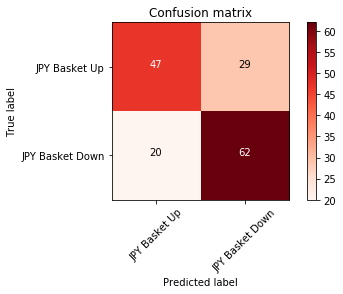

In [144]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
f1_score(y_test, yhat, average='weighted')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['JPY Basket Up','JPY Basket Down'],normalize= False,  title='Confusion matrix')

In [76]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.68      0.76      0.72        82
          1       0.70      0.62      0.66        76

avg / total       0.69      0.69      0.69       158



The Results indicate that Logistic Regression was a superior way rather than Linear or Polynomial Regression. Interestingly the Recall value for prediction of JPY Being down are higher

In [94]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6005834504990297

In [93]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

Avg F1-score: 0.6815
Jaccard score: 0.6835


The log loss with the result is quite large so it is not the ideal for the current situation

### Support Vector Machines

Another classification algorithm that can used for the SVM. Which can be used for multideminsional analysis. There are a number of kernel functions available for running Support Vector Machines. Radial Based Function (RBF) was selected because not only linear and polynomial turned out to be a poor predictor but also RBF offer good generalization, strong tolerance to input noise, and online learning ability.

             precision    recall  f1-score   support

          0       0.68      0.77      0.72        82
          1       0.71      0.62      0.66        76

avg / total       0.70      0.70      0.69       158

Confusion matrix, without normalization
[[47 29]
 [19 63]]


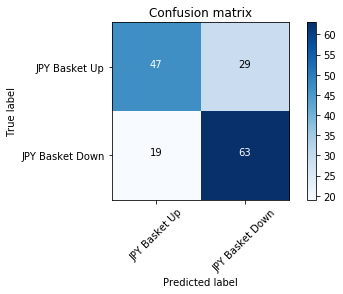

In [69]:
## Split the data for testing
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

##Import the svm model
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import itertools


## Design the Confusion Matrix and score the model

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['JPY Basket Up','JPY Basket Down'],normalize= False,  title='Confusion matrix')

In [71]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

Avg F1-score: 0.6942
Jaccard score: 0.6962


SVM resulted being slightly more accurate than Logistic Regression. 

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

## K Nearest Neighbor

Another possible algorithm to use is the K Nearest neighbour. The reason for its selection was it is robust with regard to the search space; for instance, classes don't have to be linearly separable.

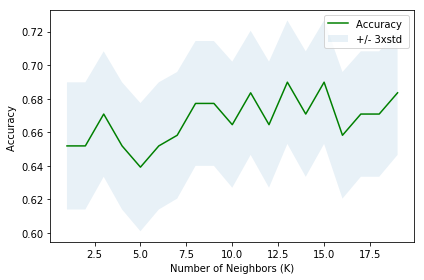

In [98]:
## Set Up the sets for the algorithm

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

##As there are multiple possibilities rather than running through the algorithm manually run and map out the possibilities

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [96]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.689873417721519 with k= 13


The results were Better than Logistic but worse than SVM one more to try out Bayenisian

## Further Research
One of further research ideas is to look at more markets and their correlation with JPY Basket

In [103]:
RATemp.corr()

,% Change ASX,% Change CAC,% Change DAX,% Change FTSE,% Change HS,% Change NK,% Change DJIA,% Change JPY,% Change CHF,% Change Gold,JPY
% Change ASX,1.000000,0.685373,0.654485,0.719033,0.651803,0.654329,0.660565,-0.397376,-0.268395,0.106730,-0.265671
% Change CAC,0.685373,1.000000,0.937898,0.902829,0.624477,0.701172,0.789858,-0.490649,-0.278222,0.053021,-0.359850
% Change DAX,0.654485,0.937898,1.000000,0.868527,0.610848,0.690315,0.793370,-0.486478,-0.280810,0.056761,-0.330799
% Change FTSE,0.719033,0.902829,0.868527,1.000000,0.639064,0.667276,0.801043,-0.443746,-0.283322,0.094540,-0.321111
% Change HS,0.651803,0.624477,0.610848,0.639064,1.000000,0.649736,0.567555,-0.467793,-0.225427,0.154315,-0.299518
% Change NK,0.654329,0.701172,0.690315,0.667276,0.649736,1.000000,0.660708,-0.585852,-0.301094,-0.014684,-0.426307
% Change DJIA,0.660565,0.789858,0.793370,0.801043,0.567555,0.660708,1.000000,-0.494618,-0.295404,0.052916,-0.347978
% Change JPY,-0.397376,-0.490649,-0.486478,-0.443746,-0.467793,-0.585852,-0.494618,1.000000,0.370377,-0.022765,0.701868
% Change CHF,-0.268395,-0.278222,-0.280810,-0.283322,-0.225427,-0.301094,-0.295404,0.370377,1.000000,0.154073,0.261938
% Change Gold,0.106730,0.053021,0.056761,0.094540,0.154315,-0.014684,0.052916,-0.022765,0.154073,1.000000,0.012945


## For Further Research

A potential branch for further direction is directed at specific markets example of the differences European Markets correlate with JPY Basket

In [123]:
## Create New DataFrame to load only European Markets used in previous analysis and additional ones

ATX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/Austria_ATX.csv")
CAC=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/CAC.csv")
DAX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/DAX.csv")
FTSE100=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/FTSE100.csv")
ISEQ=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/Ireland_ISEQ.csv")
AEX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/Netherlands_AEX.csv")
IBEX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/Spain_IBEX.csv")
OMX=pd.read_csv("https://raw.githubusercontent.com/ThoughtLiberator/Data-Science-Project/Risk-Assets/Sweden_OMX.csv")

## Drop all columns from data frames except %Change
AEX=AEX.drop(["Open","High","Low","Close"],axis=1)
ATX=ATX.drop(["Open","High","Low","Close"],axis=1)
CAC=CAC.drop(["Open","High","Low","Close"],axis=1)
DAX=DAX.drop(["Open","High","Low","Close"],axis=1)
FTSE100=FTSE100.drop(["Open","High","Low","Close"],axis=1)
ISEQ=ISEQ.drop(["Open","High","Low","Close"],axis=1)
IBEX=IBEX.drop(["Open","High","Low","Close"],axis=1)
OMX=OMX.drop(["Open","High","Low","Close"],axis=1)


##Combine all assets into a new DF

data_frames = [ATX, CAC,DAX, ISEQ, AEX, IBEX, OMX,FTSE100    ]


EuroEquities = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)


In [124]:


EuroEquities=pd.merge(EuroEquities, SAFE_HAVENS, on=['Date'])

EuroEquities.head()


,Date,% Change ATX,% Change CAC,% Change DAX,% Change ISEQ,% Change AEX,% Change IBEX,% Change OMX,% Change FTSE,% Change JPY,% Change CHF,% Change Gold
0,21/03/2005,-0.95,0.68,0.38,0.55,0.48,0.49,0.81,-0.02,0.896,-1.120106,-3.32
1,28/03/2005,2.13,0.04,0.69,-1.65,-0.92,-0.21,1.06,-0.17,-1.170,-0.385056,0.28
2,04/04/2005,1.50,1.08,0.62,2.00,1.47,1.04,1.60,1.42,-0.554,0.637865,0.23
3,11/04/2005,-1.91,-2.23,-2.01,-1.11,-2.50,-2.46,-0.86,-1.85,0.848,0.031149,-0.47
4,18/04/2005,-0.96,-1.29,-2.07,-1.80,-2.22,-0.64,0.21,-0.86,0.968,0.608414,2.21


In [125]:
EuroEquities.corr()

,% Change ATX,% Change CAC,% Change DAX,% Change ISEQ,% Change AEX,% Change IBEX,% Change OMX,% Change FTSE,% Change JPY,% Change CHF,% Change Gold
% Change ATX,1.000000,0.839283,0.803937,0.728256,0.833005,0.784612,0.797887,0.800825,-0.495950,-0.265453,0.099407
% Change CAC,0.839283,1.000000,0.937898,0.778383,0.935809,0.878081,0.872445,0.902829,-0.490649,-0.278222,0.053021
% Change DAX,0.803937,0.937898,1.000000,0.750501,0.901626,0.830979,0.858394,0.868527,-0.486478,-0.280810,0.056761
% Change ISEQ,0.728256,0.778383,0.750501,1.000000,0.775554,0.670358,0.712597,0.734356,-0.392792,-0.265276,-0.052551
% Change AEX,0.833005,0.935809,0.901626,0.775554,1.000000,0.813355,0.855836,0.899902,-0.479216,-0.311593,0.043690
% Change IBEX,0.784612,0.878081,0.830979,0.670358,0.813355,1.000000,0.772107,0.778668,-0.471593,-0.247897,0.036619
% Change OMX,0.797887,0.872445,0.858394,0.712597,0.855836,0.772107,1.000000,0.846950,-0.463484,-0.282521,0.043437
% Change FTSE,0.800825,0.902829,0.868527,0.734356,0.899902,0.778668,0.846950,1.000000,-0.443746,-0.283322,0.094540
% Change JPY,-0.495950,-0.490649,-0.486478,-0.392792,-0.479216,-0.471593,-0.463484,-0.443746,1.000000,0.370377,-0.022765
% Change CHF,-0.265453,-0.278222,-0.280810,-0.265276,-0.311593,-0.247897,-0.282521,-0.283322,0.370377,1.000000,0.154073


Potential to compare different countries versus JPY Basket

In [137]:
data = {'Country':['Austria', 'France', 'Germany', 'Ireland','Netherlands','Spain','Sweden','United Kingdom'], 'Correlation with JPY':[-0.5, -0.49,-0.48,-0.39,-0.47, -0.47,-0.46,-0.44]} 

CH_Data = pd.DataFrame(data) 

In [138]:

CH_Data.head(8)







,Correlation with JPY,Country
0,-0.50,Austria
1,-0.49,France
2,-0.48,Germany
3,-0.39,Ireland
4,-0.47,Netherlands
5,-0.47,Spain
6,-0.46,Sweden
7,-0.44,United Kingdom


In [139]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbuser/anaconda3_420:

The following NEW packages will be INSTALLED:

    _libgcc_mutex: 0.1-main              conda-forge
    altair:        4.1.0-py_0            conda-forge
    branca:        0.4.0-py_0            conda-forge
    folium:        0.5.0-py_0            conda-forge
    readline:      7.0-ha6073c6_4                   
    tbb:           2019.3-h2d50403_0     conda-forge
    tbb4py:        2019.1-py35h2d50403_0 conda-forge
    vincent:       0.4.4-py_1            conda-forge

The following packages will be UPDATED:

    conda:         4.3.31-py35_0                     --> 4.5.11-py35_0        conda-forge
    pycosat:       0.6.1-py35_1                      --> 0.6.3-py35h470a237_1 conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    conda-env:     2.6.0-h36134e3_1                  --> 2.6.0-1              conda-

In [141]:

# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
print('GeoJSON file downloaded!')


GeoJSON file downloaded!


In [160]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
Euro_map = folium.Map(location=[45, 0], zoom_start=4, tiles='Mapbox Bright')


In [161]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
Euro_map.choropleth(
    geo_data=world_geo,
    data=CH_Data,
    columns=['Country', 'Correlation with JPY'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Stockmarket correlation with JPY Basket '
)

# display map
Euro_map